# TD calcul Stochastique

## 2. Contexte du Cas Pratique

J'ai choisi une option d'achat sur l'action de TotalEnergies pour ce TD. Ce choix est motivé par la volatilité du secteur énergétique et l'importance de TotalEnergies dans l'économie française. Les fluctuations des prix du pétrole et la transition vers les énergies renouvelables rendent leurs actions particulièrement intéressantes pour l'analyse stochastique. De plus, en tant qu'étudiant, je trouve le secteur énergétique fascinant en raison de son impact global et de sa complexité.

## 4. Questions de TD
### A. Théorie et Concepts 
#### 1. Définitions Fondamentales 

Le mouvement brownien, également connu sous le nom de processus de Wiener, est un type de processus stochastique qui joue un rôle central en finance mathématique. Il s'agit d'un modèle de la manière aléatoire dont les prix des actifs financiers, comme les actions, peuvent évoluer au fil du temps. Caractérisé par son imprévisibilité et sa continuité, le mouvement brownien est utilisé pour modéliser des fluctuations de prix qui semblent se déplacer de manière aléatoire mais suivent en réalité une distribution statistique précise.

Une équation différentielle stochastique (EDS) est une équation différentielle dans laquelle l'un ou plusieurs des termes est un processus stochastique, généralement un mouvement brownien. Les EDS sont utilisées pour modéliser l'évolution dans le temps de quantités sujettes à l'aléa, comme les prix des actifs financiers. Elles permettent de tenir compte de l'incertitude et de la volatilité dans les modèles financiers.

Ces concepts sont particulièrement pertinents pour les actions du CAC 40 pour plusieurs raisons :

1. **Modélisation de la Volatilité** : Les actions du CAC 40, comme toutes les actions, sont sujettes à la volatilité due à divers facteurs économiques, politiques et sociaux. Le mouvement brownien aide à modéliser cette volatilité de manière réaliste.

2. **Prix des Options et Instruments Dérivés** : Les EDS sont au cœur de modèles tels que le modèle de Black-Scholes, utilisé pour évaluer les options et autres instruments dérivés liés aux actions du CAC 40.

3. **Analyse de Risque** : En finance, comprendre et quantifier le risque est essentiel. Le mouvement brownien et les EDS fournissent un cadre pour analyser et gérer le risque associé aux fluctuations des prix des actions.

4. **Prise de Décision Stratégique** : Les investisseurs et les gestionnaires de fonds utilisent ces outils mathématiques pour prendre des décisions éclairées concernant l'achat, la vente ou la couverture d'actifs financiers.

En somme, le mouvement brownien et les EDS sont des outils mathématiques fondamentaux pour comprendre et prédire le comportement des prix des actions du CAC 40, ce qui est crucial pour la prise de décision en finance.

#### 2. Modèle de Black-Scholes :

L'équation de Black-Scholes est un modèle mathématique crucial pour déterminer le prix théorique d'options financières, notamment les options d'achat (call) et de vente (put) européennes. Le modèle a été développé par Fischer Black, Myron Scholes et Robert Merton dans les années 1970. Pour simplifier, je vais me concentrer sur l'option d'achat européenne.

**Hypothèses du Modèle de Black-Scholes** :
1. Le marché est efficient et les actifs suivent un mouvement brownien géométrique avec volatilité constante.
2. Les taux d'intérêt sont constants et connus.
3. Il n'y a pas de dividendes payés pendant la durée de vie de l'option.
4. Il n'y a pas de coûts de transaction ou de taxes.
5. L'option ne peut être exercée qu'à son échéance (pour une option européenne).

**L'Équation de Black-Scholes pour une Option d'Achat Européenne** :
La formule pour le prix d'une option d'achat européenne est donnée par :

C(S, t) = S * N(d_1) - X * e^{-r(T-t)} * N(d_2)

où :
- \( C(S, t) \) est le prix de l'option d'achat.
- \( S \) est le prix actuel de l'action.
- \( X \) est le prix d'exercice de l'option.
- \( T \) est le temps jusqu'à l'échéance.
- \( t \) est le temps actuel.
- \( r \) est le taux d'intérêt sans risque.
- \( N() \) est la fonction de distribution cumulative de la loi normale.
- \( d_1 \) et \( d_2 \) sont donnés par :

d_1 = (ln(S/X) + (r + sigma^2/2)(T-t))/(sigma*sqrt{T-t})
d_2 = d_1 - sigma * sqrt{T-t}

- \( sigma \) est la volatilité de l'action.

**Exemple avec une Action du CAC 40** :
Imaginons que nous voulons calculer le prix d'une option d'achat sur une action de TotalEnergies.

Supposons que :
- Le prix actuel de l'action (S) est de 50 €.
- Le prix d'exercice (X) est de 55 €.
- L'option expire dans un an (T-t = 1).
- Le taux d'intérêt sans risque (r) est de 2% (0.02).
- La volatilité annuelle (σ) est de 20% (0.20).

Nous pouvons alors calculer \( d_1 \) et \( d_2 \) et ensuite utiliser ces valeurs pour estimer le prix de l'option d'achat.

Cette formule de Black-Scholes permet aux traders et investisseurs d'évaluer le prix juste d'une option d'achat européenne sur une action du CAC 40, en tenant compte des paramètres du marché et de l'actif sous-jacent.

### B. Application Pratique en Python 
#### 1. Données du CAC 40 :

In [2]:
# avant d'exécuter la suite assurez cous d'avoir installé:
# pip install yfinance pandas matplotlib


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  58.500000  60.139999  58.480000  60.020000  57.064919  3907873
2023-01-03  59.799999  60.930000  58.689999  58.980000  56.076126  5540506
2023-01-04  58.150002  58.549999  57.380001  57.599998  54.764069  7364586
2023-01-05  57.400002  58.189999  57.330002  57.939999  55.087326  5310799
2023-01-06  58.209999  59.040001  58.099998  58.680000  55.790897  4484094


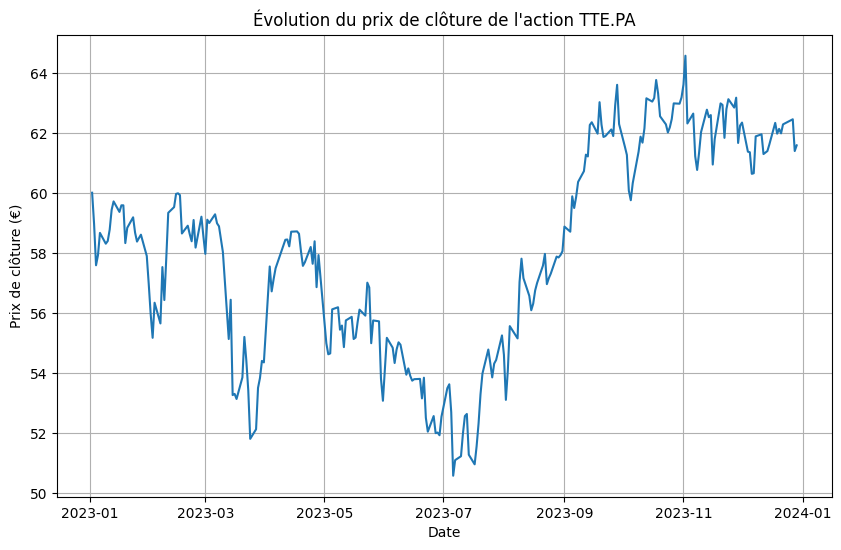

In [6]:
# téléchargement et analyse des données historiques. 

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Définir le symbole boursier de l'action TotalEnergies
symbole = 'TTE.PA'

# Télécharger les données historiques de l'action
donnees = yf.download(symbole, start='2023-01-01', end='2024-01-01')

# Afficher les premières lignes des données pour vérifier
print(donnees.head())

# Tracer un graphique de l'évolution du prix de clôture
plt.figure(figsize=(10, 6))
plt.plot(donnees['Close'])
plt.title(f'Évolution du prix de clôture de l\'action {symbole}')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (€)')
plt.grid(True)
plt.show()


Pour estimer la volatilité d'une action à partir de données historiques, on utilise généralement la volatilité historique, qui est une mesure de la dispersion des rendements d'un actif. Voici comment procéder :

##### 1. Calcul des Rendements Quotidiens
La première étape consiste à calculer les rendements quotidiens de l'action. Les rendements sont généralement calculés en utilisant la formule du rendement logarithmique, qui est préférée pour ses propriétés de normalisation et parce qu'elle est symétrique par rapport aux gains et aux pertes. La formule est :

R_t = ln(P_t/P_{t-1})

où R_t est le rendement au jour t, P_t est le prix de l'action au jour t, et P_{t-1} est le prix de l'action le jour précédent.

##### 2. Calcul de la Volatilité Historique
La volatilité est ensuite estimée en calculant l'écart-type des rendements quotidiens. En finance, la volatilité est souvent exprimée en termes annuels. Pour convertir l'écart-type quotidien en volatilité annuelle, on multiplie par la racine carrée du nombre de jours de trading dans une année (typiquement 252 jours pour le marché boursier) :

sigma_{annuelle} = sigma_{quotidien} * sqrt{252}

où sigma_{annuelle} est la volatilité annuelle et sigma_{quotidien} est l'écart-type des rendements quotidiens.


### 2. Simulation du Mouvement Brownien : 
Pour simuler le mouvement brownien géométrique de l'action choisie avec différents niveaux de volatilité, nous utiliserons Python. Le mouvement brownien géométrique est une façon de modéliser l'évolution du prix d'une action, prenant en compte à la fois la tendance constante (drift) et la volatilité.

La formule du mouvement brownien géométrique est la suivante :

S(t)=S0*exp((μ− 1/2*σ)t+σ*W(t))

où :
S(t) est le prix de l'action au temps
t.
S0 est le prix de l'action au temps initial.
μ est le taux de rendement attendu (drift).
σ est la volatilité de l'action.
W(t) est un processus de Wiener (ou mouvement brownien standard).
Pour simuler ce processus, nous allons :

Diviser les Données : Séparer les données en deux ensembles, un pour l'entraînement (80% des données) et un pour la simulation (20% des données).

Simuler le Mouvement Brownien Géométrique : Utiliser le mouvement brownien géométrique pour simuler le prix de l'action pour les 20% restants de l'année.

Visualiser les Résultats : Tracer les simulations et la vraie trajectoire des prix sur le même graphique.

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np

# Calculer les rendements quotidiens
donnees['Rendements'] = np.log(donnees['Close'] / donnees['Close'].shift(1))

# Calculer la volatilité quotidienne (écart-type des rendements)
vol_quotidienne = donnees['Rendements'].std()

# Convertir en volatilité annuelle
vol_annuelle = vol_quotidienne * np.sqrt(252)  # 252 jours de trading par an

print(f"La volatilité annuelle de l'action TotalEnergies est : {vol_annuelle * 100:.2f}%")


La volatilité annuelle de l'action TotalEnergies est : 23.44%


Il est important de noter que la volatilité ne prédit pas nécessairement la direction future des prix de l'action, mais elle indique la variabilité passée. 

[*********************100%%**********************]  1 of 1 completed


C:\Users\decroux paul\AppData\Local\Temp\ipykernel_10476\1428395082.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_entrainement['Rendements'] = np.log(donnees_entrainement['Close'] / donnees_entrainement['Close'].shift(1))


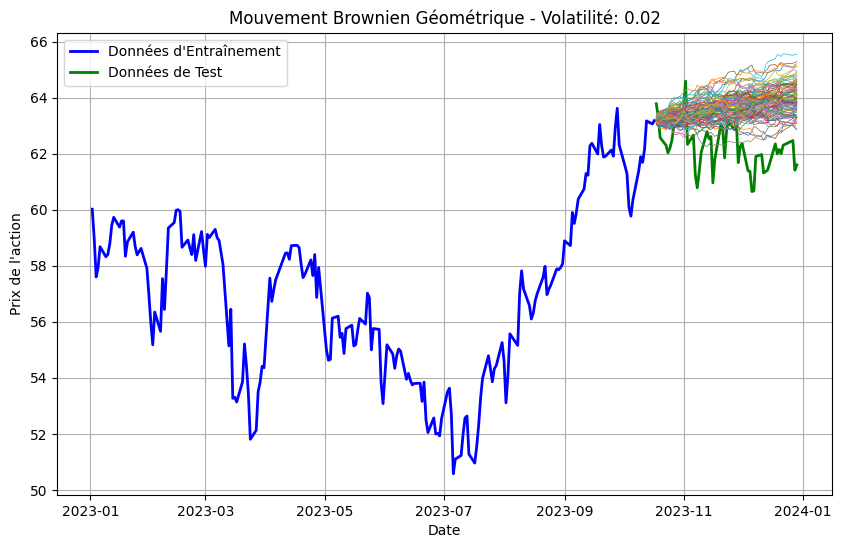

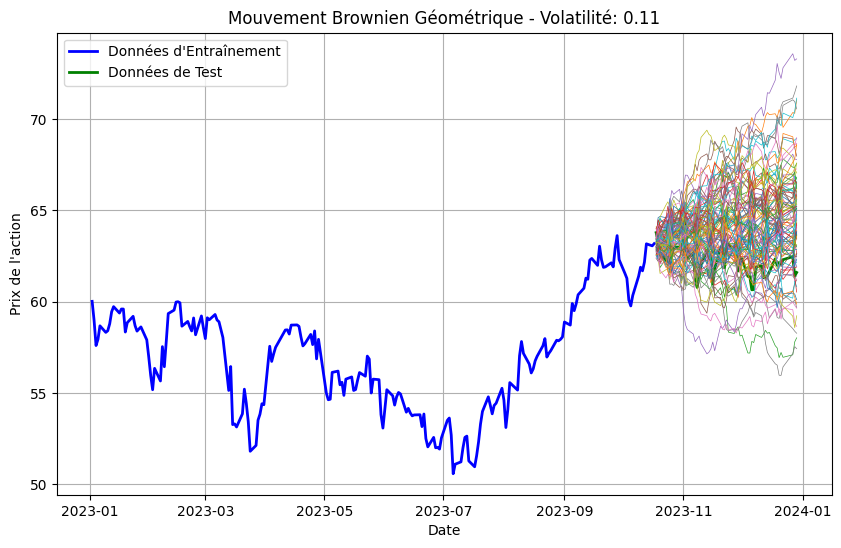

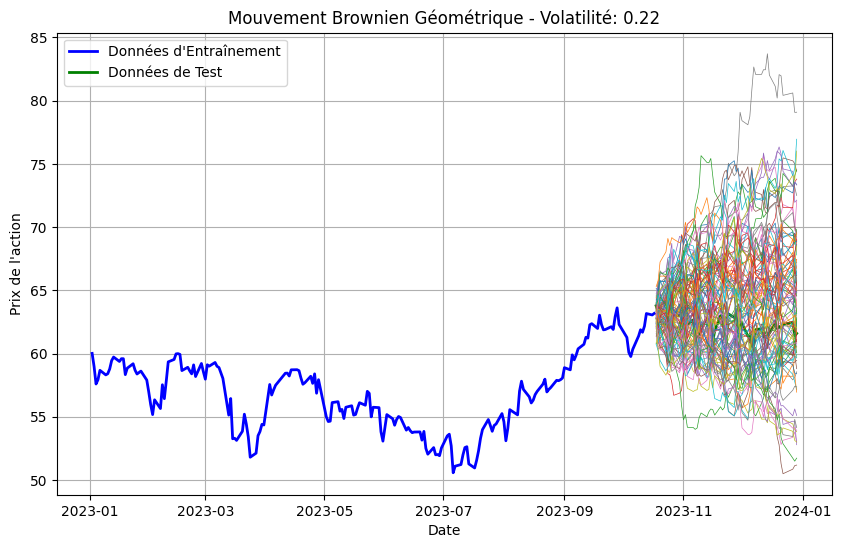

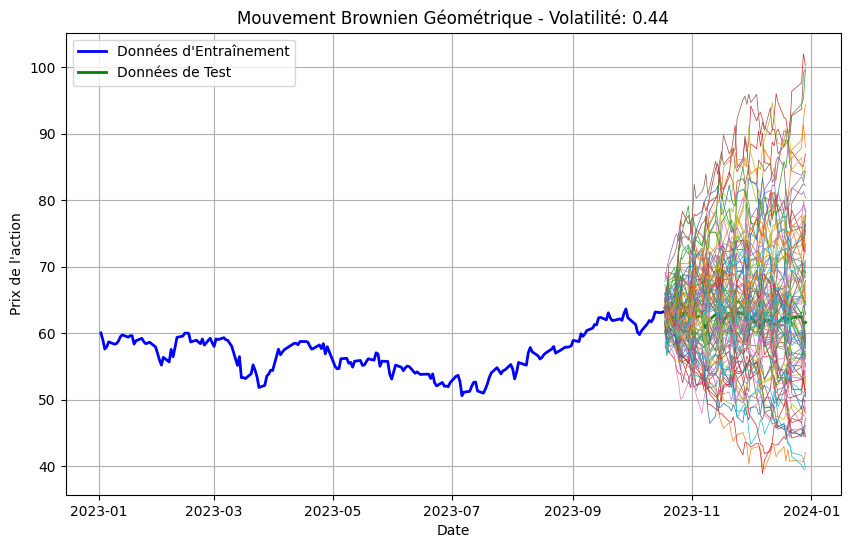

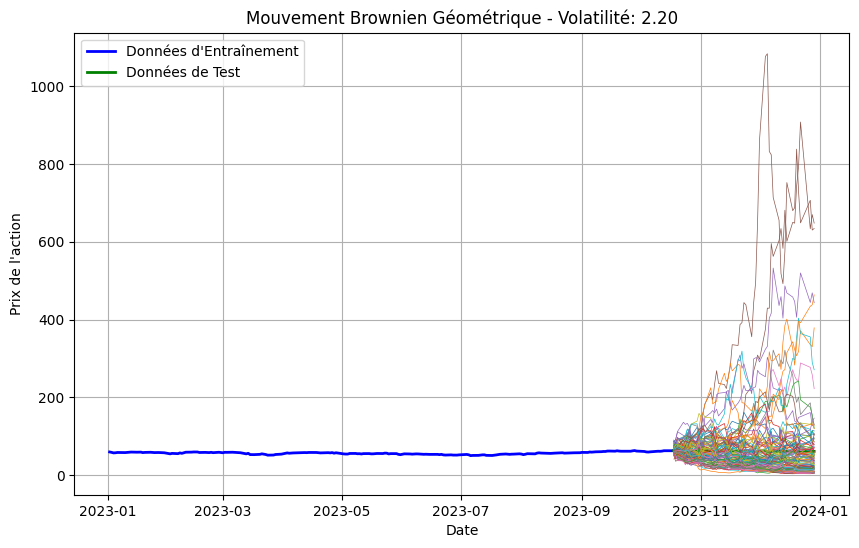

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données historiques de l'action
symbole = 'TTE.PA'
donnees = yf.download(symbole, start='2023-01-01', end='2024-01-01')

# Diviser les données en 80% pour l'entraînement et 20% pour la simulation
taille_entrainement = int(len(donnees) * 0.8)
donnees_entrainement = donnees.iloc[:taille_entrainement]
donnees_simulation = donnees.iloc[taille_entrainement:]

# Calculer les rendements quotidiens pour les données d'entraînement
donnees_entrainement['Rendements'] = np.log(donnees_entrainement['Close'] / donnees_entrainement['Close'].shift(1))

# Calculer la volatilité quotidienne (écart-type des rendements) sur les données d'entraînement
vol_quotidienne = donnees_entrainement['Rendements'].std()

# Convertir en volatilité annuelle, en utilisant le nombre réel de jours de données d'entraînement pour la volatilité
vol_annuelle = vol_quotidienne * np.sqrt(len(donnees_entrainement))

# Calculer le taux de rendement attendu (mu) comme le rendement moyen quotidien des données d'entraînement
# Utiliser le nombre total de jours dans l'ensemble des données pour le calcul de mu
mu = donnees_entrainement['Rendements'].mean() * len(donnees)

# Paramètres pour la simulation
T = len(donnees_simulation) / len(donnees)  # Durée de la simulation en proportion d'une année complète
dt = 1 / len(donnees)  # Pas de temps, basé sur le nombre total de jours dans les données
N = len(donnees_simulation)  # Nombre de points dans le temps pour la simulation
S0 = donnees_entrainement['Close'][-1]  # Prix initial pour la simulation

# Niveaux de volatilité pour la simulation
volatilites = [vol_annuelle * i for i in [0.1, 0.5, 1, 2, 10]]

# Réaliser les simulations
for sigma in volatilites:
    plt.figure(figsize=(10, 6))
    # Afficher la courbe d'entraînement
    plt.plot(donnees['Close'][:taille_entrainement], label='Données d\'Entraînement', color='blue', lw=2)
    # Afficher la partie de test
    plt.plot(donnees['Close'][taille_entrainement:], label='Données de Test', color='green', lw=2)
    # Ajouter les simulations
    for _ in range(100):
        W = np.random.standard_normal(size=N)
        W = np.cumsum(W) * np.sqrt(dt)
        S = S0 * np.exp((mu - 0.5 * sigma**2) * np.linspace(0, T, N) + sigma * W)
        dates_simulation = donnees.index[taille_entrainement:taille_entrainement+N]
        plt.plot(dates_simulation, S, lw=0.5)

    plt.title(f'Mouvement Brownien Géométrique - Volatilité: {sigma:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Prix de l\'action')
    plt.legend()
    plt.grid(True)
    plt.show()


Les graphiques montrent que plus la volatilité est élevée, plus la dispersion des trajectoires simulées est grande. Les simulations à faible volatilité ne capturent pas les grandes variations des prix, tandis que les volatilités élevées peuvent produire des scénarios extrêmes qui s'écartent de la réalité historique. Aucune simulation ne prédit exactement les prix futurs, mais elles offrent une gamme de scénarios possibles, soulignant l'importance de choisir une volatilité qui correspond bien à l'environnement de marché et au comportement historique de l'action pour des prévisions plus réalistes. En l'oocurence la volatilité annuelle issue des données d'entrainement n'est pas forcement la plus efficace car la partie test montre un comportement plus stable qu'historiquement.

### 3.Évaluation d'une Option d'Achat avec Monte Carlo



In [19]:
import numpy as np

# Paramètres de l'option adaptés aux données d'entraînement
S0 = donnees_entrainement['Close'].iloc[-1]  # Dernier prix de clôture des données d'entraînement
K = S0 * 1.1  # Prix d'exercice à 10% au-dessus du dernier prix de clôture
T = 6/12  # Supposons une échéance de 6 mois
r = 0.01  # Taux d'intérêt sans risque annuel estimé pour un mois
sigma = vol_annuelle  # Volatilité annuelle calculée à partir des données d'entraînement
M = 10000  # Nombre de simulations

# Générer des échantillons aléatoires à partir d'une distribution normale
Z = np.random.standard_normal(M)

# Calculer les prix d'actions à l'échéance pour chaque simulation
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)

# Calculer le payoff pour chaque simulation
payoff = np.maximum(ST - K, 0)

# Actualiser le payoff pour obtenir la valeur actuelle
option_price = np.exp(-r * T) * np.mean(payoff)

print(f"Le prix estimé de l'option d'achat européenne est : {option_price:.2f}")


Le prix estimé de l'option d'achat européenne est : 1.82


La volatilité et le temps jusqu'à l'échéance sont deux des principaux facteurs qui influencent le prix d'une option. En général :

Volatilité : Plus la volatilité est élevée, plus le prix de l'option est généralement élevé, car il y a une plus grande chance que l'option finisse dans la monnaie (c'est-à-dire avec un profit pour le détenteur de l'option).
Temps jusqu'à l'échéance : Plus il y a de temps jusqu'à l'échéance, plus le prix de l'option est généralement élevé, car il y a plus de temps pour que l'option finisse dans la monnaie.

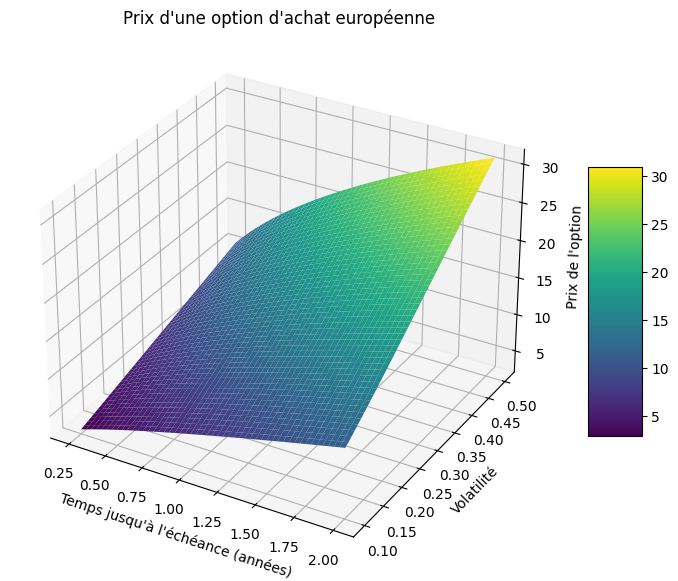

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Paramètres de base
S0 = 100  # Prix actuel de l'action
K = 100   # Prix d'exercice de l'option
T = np.linspace(0.25, 2, 50)  # Temps jusqu'à l'échéance en années
r = 0.05  # Taux d'intérêt sans risque
volatilites = np.linspace(0.1, 0.5, 50)  # Gamme de volatilités

# Préparer le maillage pour le graphique 3D
T_mesh, sigma_mesh = np.meshgrid(T, volatilites)
option_prices = np.zeros_like(T_mesh)

# Calculer le prix de l'option pour chaque paire de volatilité et temps jusqu'à l'échéance
for i in range(T_mesh.shape[0]):
    for j in range(T_mesh.shape[1]):
        t = T_mesh[i, j]
        sigma = sigma_mesh[i, j]
        d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
        d2 = d1 - sigma * np.sqrt(t)
        option_prices[i, j] = (S0 * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2))

# Créer le graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface
surf = ax.plot_surface(T_mesh, sigma_mesh, option_prices, cmap='viridis')

# Ajouter des titres et des labels
ax.set_xlabel('Temps jusqu\'à l\'échéance (années)')
ax.set_ylabel('Volatilité')
ax.set_zlabel('Prix de l\'option')
ax.set_title('Prix d\'une option d\'achat européenne')

# Ajouter une barre de couleur pour la légende
fig.colorbar(surf, shrink=0.5, aspect=5)

# Afficher le graphique
plt.show()


On retrouve bien les tendances attendues